In [9]:
import regex as re
import pandas as pd
import random
import requests
import urllib.request
from IPython.display import Image
#api de google sheets
from __future__ import print_function
import os.path
try:
    from googleapiclient.discovery import build
    from google_auth_oauthlib.flow import InstalledAppFlow
    from google.auth.transport.requests import Request
    from google.oauth2.credentials import Credentials
except:
    import sys
    !{sys.executable} -m pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
    from googleapiclient.discovery import build
    from google_auth_oauthlib.flow import InstalledAppFlow
    from google.auth.transport.requests import Request
    from google.oauth2.credentials import Credentials
    



In [195]:
jocs = pd.read_csv('./Jocs_da_Taula-Jocs-Gerard-and-Cris.csv', header=2)

In [196]:
jocs.head()

,Portada,Nom del joc,Numero de jugadors,Gènere,Es millor a 2?,Dificultat \nd'aprenentatge (sobre 5),Profunditat \n(sobre 5),Es pot jugar al sofà?,Duració (minuts),Jugat amb Cris?,Jugat amb David i Fran?,Estrenat?,Agrada a Cris,Agrada a David,Agrada a Fran
0,NaN,7 wonders:Duel,1 a 2,Draft,Si,2.5,3.5,No,30.0,Si,No,Si,Si,NaN,NaN
1,NaN,Illuminati,3 a 6,Economic,No,3.0,3.5,No,180.0,Si,Si,Si,Si,Neutral,Si
2,NaN,Age of war,2 a 4,Push-your-luck,No,NaN,NaN,Si,20.0,Si,Si,Si,Si,Si,Si
3,NaN,Attack on Tittan,2 a 5,Push-your-luck,No,2.0,2.0,No,40.0,Si,No,Si,Neutral,NaN,NaN
4,NaN,Dixit,3 a 8,Party,No,1.0,NaN,Si,45.0,Si,No,Si,Si,NaN,NaN


In [197]:
# dropeamos Portada porque es una imagen 
jocs.drop('Portada',axis=1,inplace=True)

In [198]:
jocs.head()

,Nom del joc,Numero de jugadors,Gènere,Es millor a 2?,Dificultat \nd'aprenentatge (sobre 5),Profunditat \n(sobre 5),Es pot jugar al sofà?,Duració (minuts),Jugat amb Cris?,Jugat amb David i Fran?,Estrenat?,Agrada a Cris,Agrada a David,Agrada a Fran
0,7 wonders:Duel,1 a 2,Draft,Si,2.5,3.5,No,30.0,Si,No,Si,Si,NaN,NaN
1,Illuminati,3 a 6,Economic,No,3.0,3.5,No,180.0,Si,Si,Si,Si,Neutral,Si
2,Age of war,2 a 4,Push-your-luck,No,NaN,NaN,Si,20.0,Si,Si,Si,Si,Si,Si
3,Attack on Tittan,2 a 5,Push-your-luck,No,2.0,2.0,No,40.0,Si,No,Si,Neutral,NaN,NaN
4,Dixit,3 a 8,Party,No,1.0,NaN,Si,45.0,Si,No,Si,Si,NaN,NaN


In [199]:
# algunos valores raros en columns
jocs.columns

Index(['Nom del joc', 'Numero de jugadors', 'Gènere', 'Es millor a 2?',
       'Dificultat \nd'aprenentatge (sobre 5)', 'Profunditat \n(sobre 5)',
       'Es pot jugar al sofà?', 'Duració (minuts)', 'Jugat amb Cris?',
       'Jugat amb David i Fran?', 'Estrenat?', 'Agrada a Cris',
       'Agrada a David', 'Agrada a Fran'],
      dtype='object')

In [200]:
jocs.rename(columns=({"Dificultat \nd'aprenentatge (sobre 5)":"Dificultat d'aprenentatge (sobre 5)"}),inplace=True)
jocs.rename(columns=({"Profunditat \n(sobre 5)":"Profunditat (sobre 5)"}),inplace=True)

In [201]:
jocs.head()

,Nom del joc,Numero de jugadors,Gènere,Es millor a 2?,Dificultat d'aprenentatge (sobre 5),Profunditat (sobre 5),Es pot jugar al sofà?,Duració (minuts),Jugat amb Cris?,Jugat amb David i Fran?,Estrenat?,Agrada a Cris,Agrada a David,Agrada a Fran
0,7 wonders:Duel,1 a 2,Draft,Si,2.5,3.5,No,30.0,Si,No,Si,Si,NaN,NaN
1,Illuminati,3 a 6,Economic,No,3.0,3.5,No,180.0,Si,Si,Si,Si,Neutral,Si
2,Age of war,2 a 4,Push-your-luck,No,NaN,NaN,Si,20.0,Si,Si,Si,Si,Si,Si
3,Attack on Tittan,2 a 5,Push-your-luck,No,2.0,2.0,No,40.0,Si,No,Si,Neutral,NaN,NaN
4,Dixit,3 a 8,Party,No,1.0,NaN,Si,45.0,Si,No,Si,Si,NaN,NaN


In [202]:
jocs['Gènere'].value_counts()

Cartes                 11
Draft                   9
Eurogame                9
Party                   8
Pseudo-Wargame          7
Abstracte               7
Ameritrash              5
Losetas                 5
Estrategia              5
Push-your-luck          4
Engine-building         3
Rols ocults             3
Economic                3
Deck building           2
Pick-up and deliver     2
4X                      2
Subastes                1
Roll and write          1
Filler                  1
Name: Gènere, dtype: int64

In [203]:
jocs[jocs['Gènere'] == 'Filler']

,Nom del joc,Numero de jugadors,Gènere,Es millor a 2?,Dificultat d'aprenentatge (sobre 5),Profunditat (sobre 5),Es pot jugar al sofà?,Duració (minuts),Jugat amb Cris?,Jugat amb David i Fran?,Estrenat?,Agrada a Cris,Agrada a David,Agrada a Fran
86,La isla del botín,2 a 5,Filler,No,2.0,2.0,NaN,60.0,No,No,No,NaN,NaN,NaN


In [204]:
# este creo podria agruparse en juego de cartas
jocs.loc[jocs[jocs['Nom del joc'] == 'La isla del botín'].index,'Gènere'] = 'Cartes'

In [205]:
jocs[jocs['Gènere'] == 'Filler']

,Nom del joc,Numero de jugadors,Gènere,Es millor a 2?,Dificultat d'aprenentatge (sobre 5),Profunditat (sobre 5),Es pot jugar al sofà?,Duració (minuts),Jugat amb Cris?,Jugat amb David i Fran?,Estrenat?,Agrada a Cris,Agrada a David,Agrada a Fran


In [206]:
jocs.query('Gènere == "Cartes"')

,Nom del joc,Numero de jugadors,Gènere,Es millor a 2?,Dificultat d'aprenentatge (sobre 5),Profunditat (sobre 5),Es pot jugar al sofà?,Duració (minuts),Jugat amb Cris?,Jugat amb David i Fran?,Estrenat?,Agrada a Cris,Agrada a David,Agrada a Fran
11,Epic,2,Cartes,Si,2.5,3.5,Si,20.0,Si,No,Si,Neutral,NaN,NaN
14,Hanafuda,2,Cartes,Si,2.5,2.5,No,15.0,Si,No,Si,NaN,NaN,NaN
19,La fallera calavera,2 a 5,Cartes,No,1.5,1.5,Si,30.0,Si,Si,Si,Si,Si,Si
29,Star realms,1 a 2,Cartes,Si,2.0,3.0,Si,20.0,No,No,Si,NaN,NaN,NaN
40,Claim,2,Cartes,Si,2.0,2.5,Si,25.0,Si,No,Si,No,NaN,NaN
51,Abluxxen,2 a 5,Cartes,No,1.5,3.0,No,15.0,Si,NaN,No,NaN,NaN,NaN
52,"Aire, Tierra y Mar",2,Cartes,Si,2.0,3.0,Si,15.0,Si,NaN,Si,NaN,NaN,NaN
55,Liberation,2,Cartes,Si,2.0,3.0,Si,30.0,No,NaN,No,NaN,NaN,NaN
73,Pájaros cantores,2 a 4,Cartes,Neutral,2.5,2.5,No,25.0,Si,No,Si,NaN,NaN,NaN
80,Influentia,3 a 4,Cartes,No,2.5,2.5,NaN,40.0,Si,NaN,Si,NaN,NaN,NaN


 ### Objetivos:
 - Crear un recomendador de juegos en base al tiempo y personas
 - Ampliar también a generos, etc..
 - Obtener el csv directamente de la url de google docs?

### Programa que usa API:

In [68]:
class Recomanador:
    
    def __init__(self):
        self.players = None
        self.dificultat = None
        self.dif_min = None
        self.dif_max = None
        self.temps = None
        
        
    
    def simple_questions(self):
        
        while True:
            valid = False
            while valid == False:
                self.players = input('quants jugadors sou? ')
                if self.players.isnumeric():
                    self.players = int(self.players)
                    valid = True
            break

        while True:
            valid = False
            while valid == False:
                print('quina profunditat de joc esperes? Facil/Mitja/Dificil \n')
                self.dificultat = input('introdueix F,M o D ')
                if self.dificultat.upper() == 'F':
                    self.dificultat = self.dificultat.upper()
                    valid = True
                elif self.dificultat.upper() == 'M':
                    self.dificultat = self.dificultat.upper()
                    valid = True
                elif self.dificultat.upper() == 'D':
                    self.dificultat = self.dificultat.upper()
                    valid = True
            break

        if self.dificultat == 'F':
            self.dif_min = 0
            self.dif_max = 2.5
        elif self.dificultat == 'M':
            self.dif_min = 2
            self.dif_max = 3.5
        else:
            self.dif_min = 3.5
            self.dif_max = 5    

        while True:
            valid = False
            while valid == False:
                print('quanta estona voleu jugar aproximadament? ')
                self.temps = input('introdueix temps en minuts ')
                if self.temps.isnumeric():
                    self.temps = int(self.temps)
                    valid = True
            break
    
    
    def simple_choice(self,data):
        queried_jocs = data.query('min <= @self.players & max >= @self.players & Duració <= (@self.temps + 15) & Duració >= (@self.temps - 15) & Profunditat >= @self.dif_min & Profunditat <= @self.dif_max ')
        while True:
            try:
                pick = random.choice(list(queried_jocs['Nom del joc']))
            except:
                print('no hi ha cap joc que cumpleixi els teus requisits\n')
                print("et recomanaré un joc a l'atzar\n")
                pick = random.choice(data['Nom del joc'])
            print(f' Perquè no jugueu a {pick} ?')
            try:
                image = requests.get(f'https://www.boardgamegeek.com/search/boardgame?q={pick}&nosession=1&showcount=20', headers = {'user-agent': '{Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36}'})
                object_pattern = re.compile('/boardgame/([0-9]*)/')
                object_id = object_pattern.findall(image.text)[0]
                resp = requests.get(f'https://api.geekdo.com/api/images?ajax=1&gallery=all&nosession=1&objectid={object_id}&objecttype=thing&pageid=1&showcount=36&size=thumb&sort=hot')
                image_url = resp.json()['images'][random.randint(0,10)]['imageurl_lg']
            except:
                print("No s'ha pogut trobar cap imatge del joc\n")
            try:
                display(Image(image_url))
            except:
                print(f'una imatge de mostra aqui: {image_url}')

            agree = input("T'agrada aquesta opció? Y/N ")
            if agree.upper() == 'Y':
                break
    
        

In [69]:
class JocDB:
    
    def __init__(self):
        self.jocs_list = []
        self.jocs_df = None
        
    
    def apiCall(self):
        # obtenim la jocs de taula sheet desded l'Api de google

        # If modifying these scopes, delete the file token.json.
        SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']

        # The ID and range of a sample spreadsheet.
        SAMPLE_SPREADSHEET_ID = '1Ixtc7aIaMxe8XeKQC9fAfBerZxYFsifS0sy0X2yJfB4'
        SAMPLE_RANGE_NAME = 'Jocs - Gerard and Cris!A1:O222'

        creds = None
            # The file token.json stores the user's access and refresh tokens, and is
            # created automatically when the authorization flow completes for the first
            # time.
        if os.path.exists('token.json'):
            creds = Credentials.from_authorized_user_file('token.json', SCOPES)
        # If there are no (valid) credentials available, let the user log in.
        if not creds or not creds.valid:
            if creds and creds.expired and creds.refresh_token:
                creds.refresh(Request())
            else:
                flow = InstalledAppFlow.from_client_secrets_file(
                    'credentials.json', SCOPES)
                creds = flow.run_local_server(port=0)
            # Save the credentials for the next run
            with open('token.json', 'w') as token:
                token.write(creds.to_json())
        service = build('sheets', 'v4', credentials=creds)

        # Call the Sheets API
        print('retrieving boardgame collection from google sheets...')
        sheet = service.spreadsheets()
        result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                    range=SAMPLE_RANGE_NAME
                                   ).execute()
        values = result.get('values', [])
        self.jocs_list = values
        
    def toDf(self):
        
        # creem a mà un Dataframe accedint a les llistes com si fosin columnes
        self.jocs_df = pd.DataFrame({'Nom del joc':[self.jocs_list[i][1] for i in range(3,len(self.jocs_list))],
                                     'Num. Jugadors':[self.jocs_list[i][2] for i in range(3,len(self.jocs_list))],
                                      'Gènere':[self.jocs_list[i][3] for i in range(3,len(self.jocs_list))],
                                      'Millor a 2?':[self.jocs_list[i][4] for i in range(3,len(self.jocs_list))],
                                      "Dificultat d'aprenentatge (sobre 5)":[self.jocs_list[i][5] for i in range(3,len(self.jocs_list))],
                                      'Profunditat':[float(self.jocs_list[i][6]) for i in range(3,len(self.jocs_list))],
                                      'Duració':[int(self.jocs_list[i][8]) for i in range(3,len(self.jocs_list))]
                                     })
        
        # continuem tractant el df
        minjoc = re.compile('([1-9]) a [1-9]')
        maxjoc = re.compile('[1-9] a ([1-9])')
        
        # creem noves columnes amb el min i el max
        for i in self.jocs_df['Num. Jugadors'].index:
            min_p = minjoc.findall(self.jocs_df.loc[i,'Num. Jugadors'])
            if len(min_p) > 0:
                min_p = int(min_p[0])
                self.jocs_df.loc[i,'min'] = min_p
            else:
                self.jocs_df.loc[i,'min'] = 0
            max_p = maxjoc.findall(self.jocs_df.loc[i,'Num. Jugadors'])
            if len(max_p) > 0:
                max_p = int(max_p[0])
                self.jocs_df.loc[i,'max'] = max_p
            else:
                self.jocs_df.loc[i,'max'] = 0
            
        #jocs només per un numero fix de persones
        for i in self.jocs_df['Num. Jugadors'].index:
            if self.jocs_df.loc[i,'min'] == 0:
                self.jocs_df.loc[i,'min'] = int(self.jocs_df.loc[i,'Num. Jugadors'])
                self.jocs_df.loc[i,'max'] = int(self.jocs_df.loc[i,'Num. Jugadors'])
       


In [70]:
def main():
    
    # creem la conexió?
    coleccio = JocDB()
    try:
        coleccio.apiCall()
    except:
        raise 'Conexió amb API ha fallat'
    
    # transformem a DataFrame
    coleccio.toDf()
    game_df = coleccio.jocs_df
    
    # creem el recomanador
    recom = Recomanador()
    recom.simple_questions()
    recom.simple_choice(game_df)
        

retrieving boardgame collection from google sheets...
quants jugadors sou? 3
quina profunditat de joc esperes? Facil/Mitja/Dificil 

introdueix F,M o D f
quanta estona voleu jugar aproximadament? 
introdueix temps en minuts 10
 Perquè no jugueu a high society ?


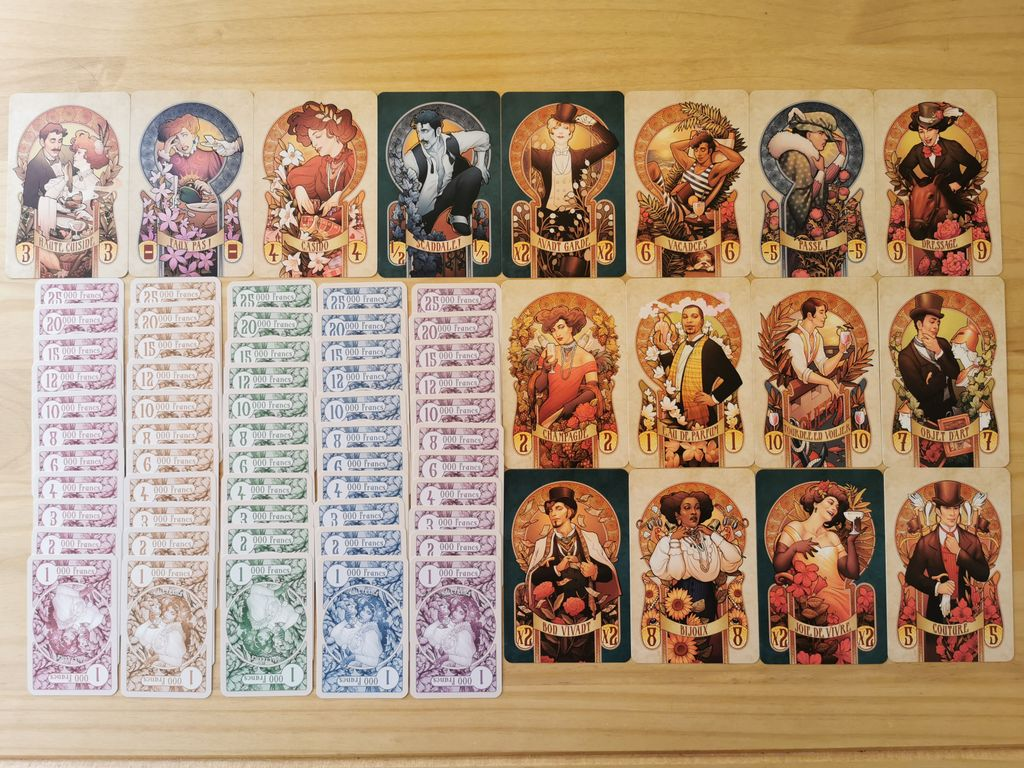

T'agrada aquesta opció? Y/N n
 Perquè no jugueu a Herbalism ?


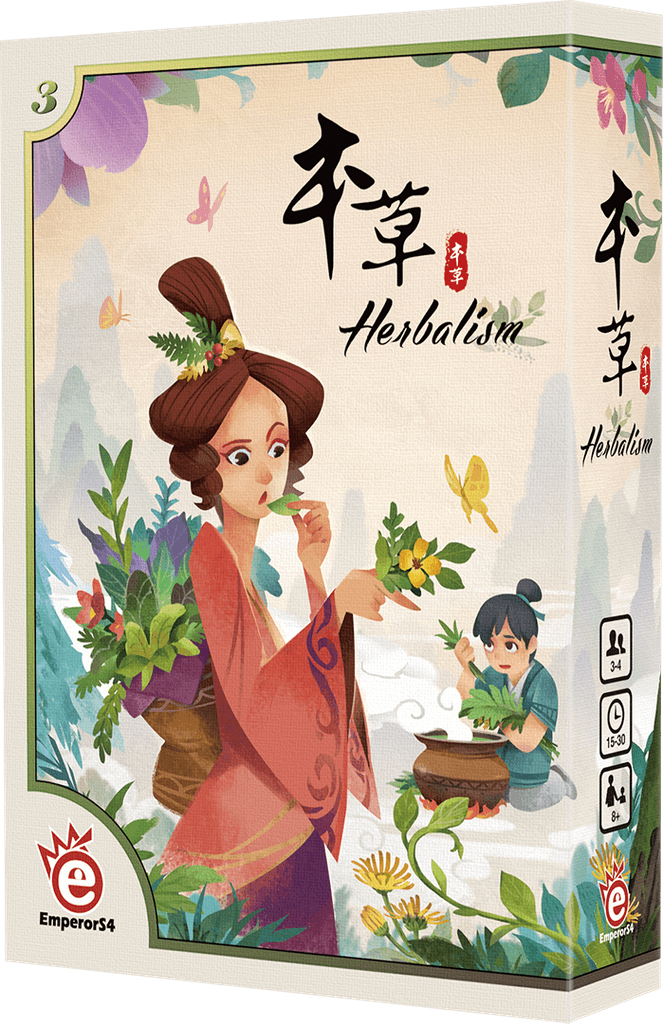

T'agrada aquesta opció? Y/N n
 Perquè no jugueu a high society ?


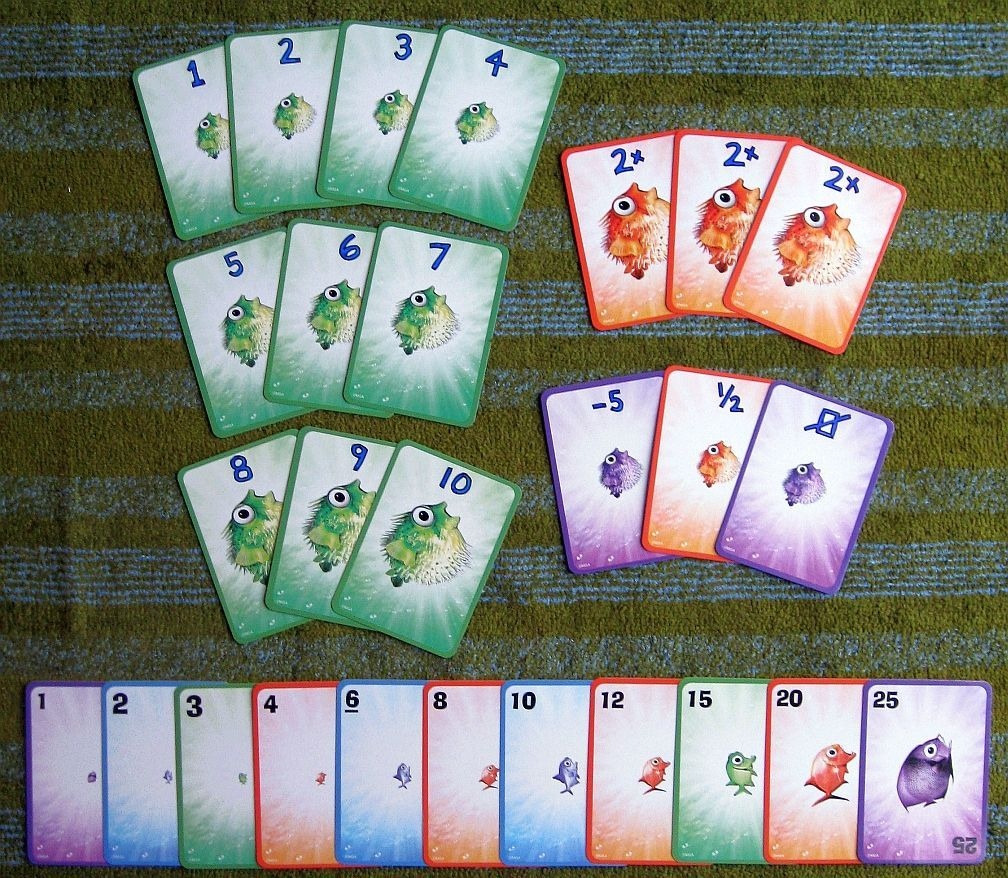

T'agrada aquesta opció? Y/N n
 Perquè no jugueu a Coloretto ?


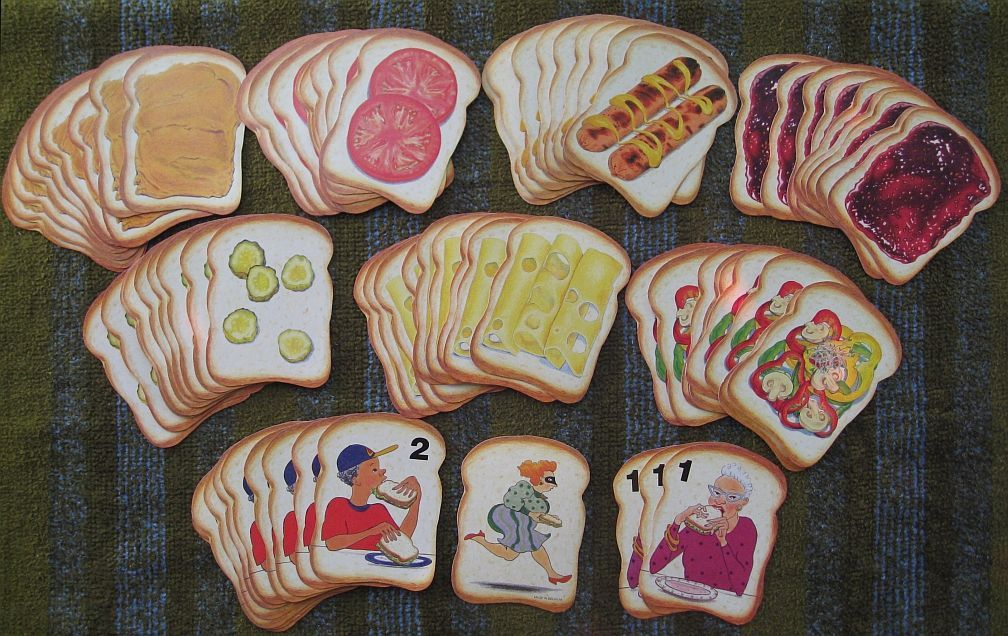

T'agrada aquesta opció? Y/N n
 Perquè no jugueu a Herbalism ?


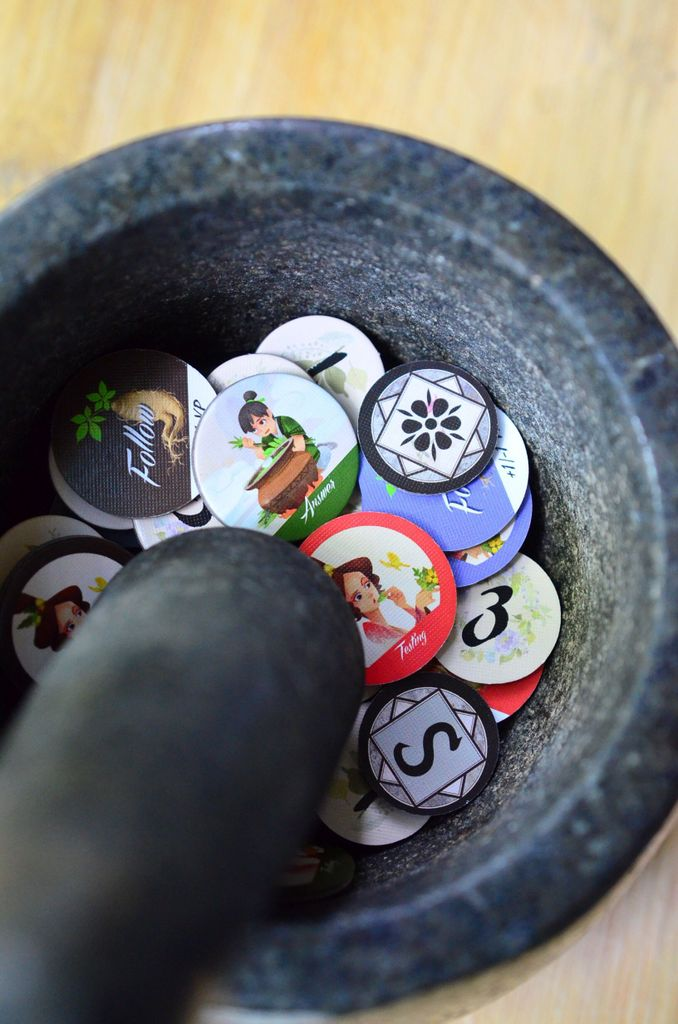

T'agrada aquesta opció? Y/N n
 Perquè no jugueu a Ohanami ?


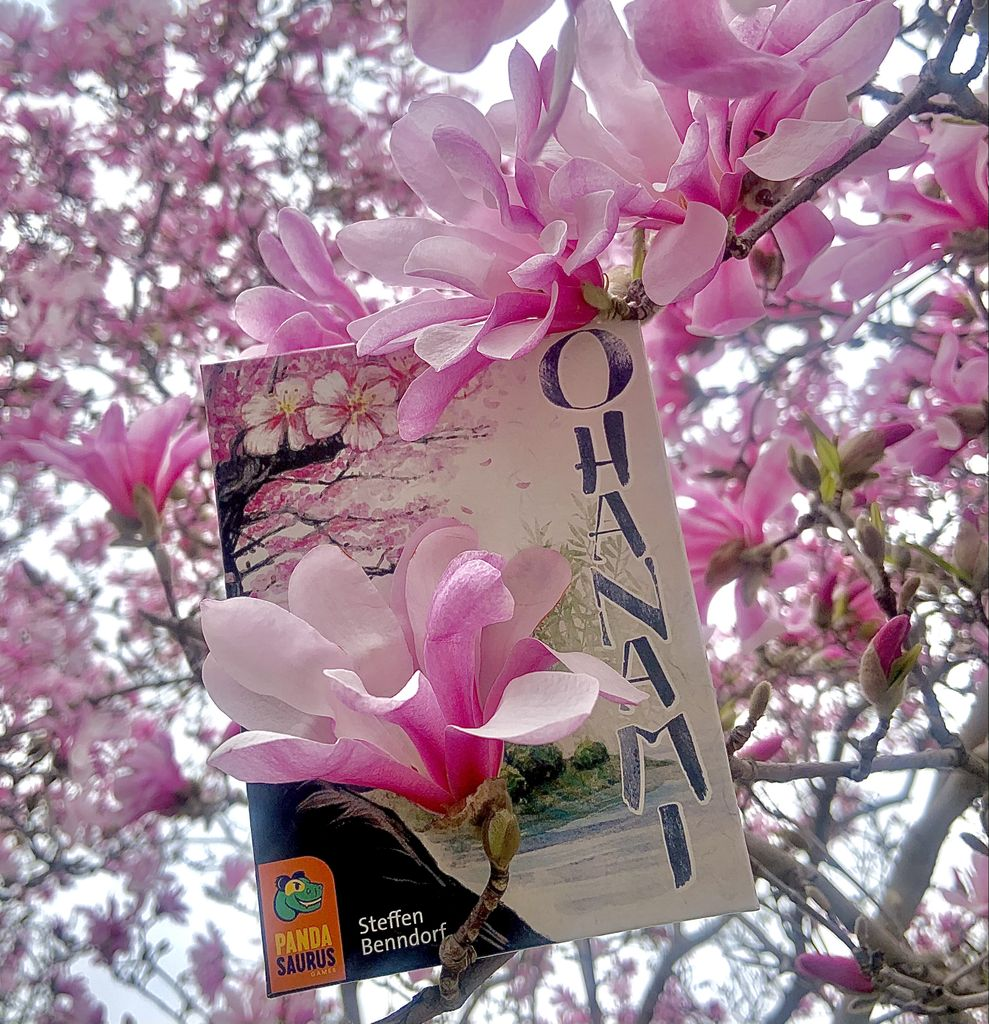

T'agrada aquesta opció? Y/N y


In [71]:
main()

In [26]:
image = requests.get('https://www.boardgamegeek.com/search/boardgame?q=Burgundy&nosession=1&showcount=20', headers = {'user-agent': '{Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36}'}) 


In [27]:
object_pattern = re.compile('/boardgame/([0-9]*)/')

In [30]:
object_id = object_pattern.findall(image.text)[0]

In [31]:
try:
    resp = requests.get(f'https://api.geekdo.com/api/images?ajax=1&gallery=all&nosession=1&objectid={object_id}&objecttype=thing&pageid=1&showcount=36&size=thumb&sort=hot')
except:
    raise 'no se encontró imagen'

In [32]:
resp

<Response [200]>

In [57]:
image_url = resp.json()['images'][random.randint(0,10)]['imageurl_lg']

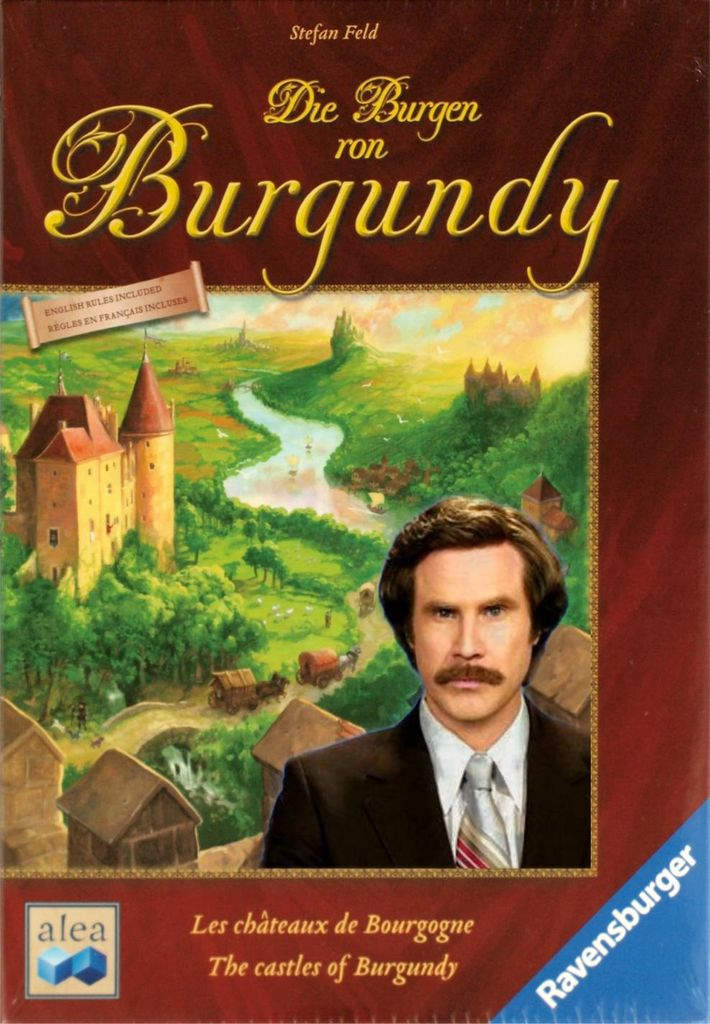

In [58]:
Image(image_url)